In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-clean/retail_clean.csv


In [2]:
! pip install inventorize

  Created wheel for inventorize: filename=inventorize-0.0.8-py3-none-any.whl size=15621 sha256=4d76c47c5f0168c7d96d4ec406fc7eeb6eeb69ea3c3e35e4b0c24bb50307c8bd
  Stored in directory: /root/.cache/pip/wheels/bd/52/8e/9f2ffa0f48556e99f5b527da3b111810a19fcdfadfb17bb37d
Successfully built inventorize


In [3]:
from sklearn.linear_model import LinearRegression
import inventorize as inv

In [4]:
## creating list of price and demand
price =[5,10,15,17,20,23,25]
demand =[600,550,700,680,500,400,250]

In [5]:
## creating df
pricing_data = pd.DataFrame({"price":price,"demand":demand})

In [6]:
pricing_data

,price,demand
0,5,600
1,10,550
2,15,700
3,17,680
4,20,500
5,23,400
6,25,250


In [7]:
model = LinearRegression()

In [8]:
model.fit(pricing_data[["price"]], pricing_data[["demand"]])

LinearRegression()

In [9]:
model.intercept_

array([766.26999059])

In [10]:
model.coef_

array([[-14.64252117]])

### Pricing fuction = a+[-b(p)], where a is the intercept and b is the coef.

### Demand Simulation

In [11]:
### defining a price for a juice

juice_cost= 2.5

In [12]:
## def price range for simulation

simulation_data = pd.DataFrame({"price":range(2,50)})

In [13]:
## calcuating expected demand based on price function

simulation_data["exp_demand"]=model.intercept_[0] + model.coef_[0] * simulation_data["price"]

In [14]:
simulation_data.head()

,price,exp_demand
0,2,736.984948
1,3,722.342427
2,4,707.699906
3,5,693.057385
4,6,678.414864


In [15]:
### calc total cost, revenue and profit for simulation data

simulation_data["total_cost"]= simulation_data["exp_demand"]* juice_cost
simulation_data["revenue"]= simulation_data["exp_demand"]* simulation_data["price"]
simulation_data["profit"]= simulation_data["revenue"]- simulation_data["total_cost"]

### Obtaining the price where profit is maximum.

In [16]:
simulation_data[simulation_data.profit== max(simulation_data.profit)]

,price,exp_demand,total_cost,revenue,profit
25,27,370.921919,927.304798,10014.891816,9087.587018


### At price 27 the profit is maximum @ 9088 with expected demand @ 371. Let's visualize the results.

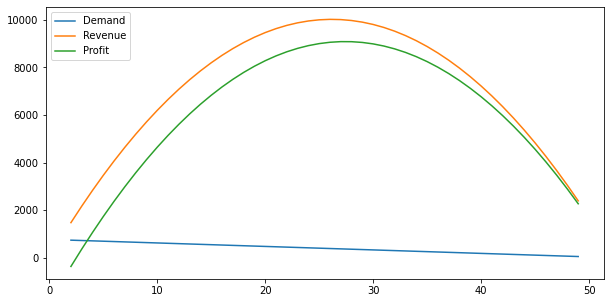

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(simulation_data.price, simulation_data.exp_demand, label="Demand")
plt.plot(simulation_data.price, simulation_data.revenue, label="Revenue")
plt.plot(simulation_data.price, simulation_data.profit, label="Profit")
plt.legend(loc= "upper left")
plt.show()
         

### Price Elasticity

#### Determining the elasticity of the pricing data for juice cost defined earlier.

In [18]:
## calc elastcity for juice cost
inv.linear_elasticity(pricing_data['price'], pricing_data['demand'],23,2.5)

{'Elasticity': array([[0.78413098]]),
 'optimum_price_profit': array([[27.41591712]]),
 'optimum_price_revenue': array([[26.16591712]])}

#### At price 23 the elasticity is 0.78, which means our product is inelastic at this price therefore we need to increase the price to match elasticity to 1.

In [19]:
retail_cln= pd.read_csv("../input/retail-clean/retail_clean.csv") 

In [20]:
retail_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   797885 non-null  int64  
 1   Invoice      797885 non-null  object 
 2   StockCode    797885 non-null  object 
 3   Description  797885 non-null  object 
 4   Quantity     797885 non-null  int64  
 5   InvoiceDate  797885 non-null  object 
 6   Price        797885 non-null  float64
 7   Customer ID  797885 non-null  float64
 8   Country      797885 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 54.8+ MB


In [21]:
retail_cln['InvoiceDate']=pd.to_datetime(retail_cln['InvoiceDate'])

In [22]:
retail_cln['year']=retail_cln['InvoiceDate'].dt.year
retail_cln['week']=retail_cln['InvoiceDate'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [23]:
## getting week_year component
retail_cln['week_year']=retail_cln['InvoiceDate'].dt.strftime("%W %Y")

In [24]:
retail_cln.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,week,week_year
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,49,48 2009
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,49,48 2009
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,49,48 2009
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,49,48 2009
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,49,48 2009


In [25]:
weekly_sales=retail_cln.groupby(["Description","week_year"]).agg(total_sales= ("Quantity","sum"),
                                                  price= ("Price","mean")).reset_index()

In [26]:
weekly_sales.head()

,Description,week_year,total_sales,price
0,DOORMAT UNION JACK GUNS AND ROSES,01 2010,16,6.590000
1,DOORMAT UNION JACK GUNS AND ROSES,02 2010,26,6.650000
2,DOORMAT UNION JACK GUNS AND ROSES,03 2010,48,6.643333
3,DOORMAT UNION JACK GUNS AND ROSES,04 2010,58,6.655882
4,DOORMAT UNION JACK GUNS AND ROSES,05 2010,3,6.750000


In [27]:
### creating a key for unique skus

keys = weekly_sales.Description.unique()

### Linear Elasticity

In [28]:
empty_df= pd.DataFrame()

for key in keys:
    try:
        a = weekly_sales[weekly_sales.Description == key]
        cost = 0.4* max(a['price'])
        current_price = a['price'].mean()
        elsticity = inv.linear_elasticity(a['price'], a['total_sales'], current_price, cost)
        elsticity = {k:v[0] for k,v in elsticity.items()}
        data = pd.DataFrame(elasticity, index=[0])
        data['Description']=key
        empty_df = pd.concat([empty_df,data], axis=0)
    except:
           continue

/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:662: RuntimeWarning: divide by zero encountered in true_divide
  optimum_profit=(-derv_p*cost_of_product+ intercept)/(2*-derv_p)
/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:663: RuntimeWarning: divide by zero encountered in true_divide
  optimum_revenue =intercept/(2*-derv_p)
/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:662: RuntimeWarning: divide by zero encountered in true_divide
  optimum_profit=(-derv_p*cost_of_product+ intercept)/(2*-derv_p)
/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:663: RuntimeWarning: divide by zero encountered in true_divide
  optimum_revenue =intercept/(2*-derv_p)
/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:662: RuntimeWarning: divide by zero encountered in true_divide
  optimum_profit=(-derv_p*cost_of_product+ intercept)/(2*-derv_p)
/opt/conda/lib/python3.7/site-packages/inventorize/__init__.py:663: RuntimeWarning: divide

In [29]:
empty_df.head()

""
